In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from api_keys_copy import yelp_api_key
import pprint
from bs4 import BeautifulSoup

In [38]:
#Retrieve 1000 random restaurants in Toronto
api_key = yelp_api_key
headers = {'Authorization': f'Bearer {api_key}',}
url = 'https://api.yelp.com/v3/businesses/search'
params = {
    'term':"restaurants",
    'location': 'Toronto',
    'limit': 50, 
}

all_businesses = []

offset = 0
while offset < 1000:
    params['offset'] = offset
    response = requests.get(url, headers=headers, params=params)
    data = response.json()

    # Check if the request was successful
    if response.status_code == 200:
        businesses = data['businesses']
        if not businesses:
            break 
        all_businesses.extend(businesses)
        offset += 50
    else:
        print(f"Error: {data['error']['code']} - {data['error']['description']}")
        break

print (len(all_businesses))

for business in all_businesses:
    print("Name:", business['name'])
    print("Categories:")
    for category in business['categories']:
        print(category['title'])
    print("Price:", business.get('price', 'N/A'))
    print("Rating:", business.get('rating', 'N/A'))
    print("Review Count:", business.get('review_count', 'N/A'))


1000
Name: Pai Northern Thai Kitchen
Categories:
Thai
Price: $$
Rating: 4.5
Review Count: 3401
Name: Mira
Categories:
Peruvian
Price: $$
Rating: 4.5
Review Count: 263
Name: Katsuya
Categories:
Japanese
Asian Fusion
Price: $$
Rating: 4.5
Review Count: 489
Name: Richmond Station
Categories:
Canadian (New)
Price: $$$
Rating: 4.5
Review Count: 888
Name: Rasa
Categories:
Canadian (New)
Tapas/Small Plates
Price: $$
Rating: 4.5
Review Count: 321
Name: Gusto 101
Categories:
Italian
Price: $$
Rating: 4.0
Review Count: 1125
Name: Trattoria Nervosa
Categories:
Italian
Pizza
Salad
Price: $$
Rating: 4.0
Review Count: 392
Name: Aloette
Categories:
French
Bistros
Diners
Price: $$$
Rating: 4.5
Review Count: 289
Name: OEB Breakfast Co.
Categories:
Breakfast & Brunch
Price: $$
Rating: 4.5
Review Count: 115
Name: Juicy Dumpling
Categories:
Dim Sum
Dumplings
Price: $
Rating: 4.5
Review Count: 609
Name: The Rabbit Hole
Categories:
Gastropubs
Price: N/A
Rating: 4.0
Review Count: 33
Name: Mogouyan Hand-Pulle

In [39]:
#convert above list into a dataframe
df = pd.DataFrame (all_businesses)
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,r_BrIgzYcwo1NAuG9dLbpg,pai-northern-thai-kitchen-toronto-5,Pai Northern Thai Kitchen,https://s3-media3.fl.yelpcdn.com/bphoto/9QruaH...,False,https://www.yelp.com/biz/pai-northern-thai-kit...,3401,"[{'alias': 'thai', 'title': 'Thai'}]",4.5,"{'latitude': 43.64784, 'longitude': -79.38872}",[],$$,"{'address1': '18 Duncan Street', 'address2': '...",+14169014724,+1 416-901-4724,3009.334743
1,KpEu3vvj1ruoID0T3lmD4Q,mira-toronto,Mira,https://s3-media4.fl.yelpcdn.com/bphoto/jHspzr...,False,https://www.yelp.com/biz/mira-toronto?adjust_c...,263,"[{'alias': 'peruvian', 'title': 'Peruvian'}]",4.5,"{'latitude': 43.64417, 'longitude': -79.39639}",[],$$,"{'address1': '420A Wellington Street W', 'addr...",+16479513331,+1 647-951-3331,3359.763701
2,saijdv-vXJrvsCfvr7SZOw,katsuya-toronto-5,Katsuya,https://s3-media3.fl.yelpcdn.com/bphoto/3fwkOK...,False,https://www.yelp.com/biz/katsuya-toronto-5?adj...,489,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",4.5,"{'latitude': 43.65995, 'longitude': -79.37882}",[],$$,"{'address1': '66 Gerrard Street E', 'address2'...",+14165917756,+1 416-591-7756,2152.401480
3,mZRKH9ngRY92bI_irrHq6w,richmond-station-toronto,Richmond Station,https://s3-media3.fl.yelpcdn.com/bphoto/agCQCt...,False,https://www.yelp.com/biz/richmond-station-toro...,888,"[{'alias': 'newcanadian', 'title': 'Canadian (...",4.5,"{'latitude': 43.6513729, 'longitude': -79.379285}",[],$$$,"{'address1': '1 Richmond Street W', 'address2'...",+16477481444,+1 647-748-1444,2911.814072
4,eKznX8VTfcQrjCqXpeobiw,rasa-toronto,Rasa,https://s3-media1.fl.yelpcdn.com/bphoto/wPprWz...,False,https://www.yelp.com/biz/rasa-toronto?adjust_c...,321,"[{'alias': 'newcanadian', 'title': 'Canadian (...",4.5,"{'latitude': 43.6627752, 'longitude': -79.4039...",[],$$,"{'address1': '196 Robert Street', 'address2': ...",+16473508221,+1 647-350-8221,1402.732947


In [40]:
#pick only columns that related to our analysis
columns_to_drop = ['id', 'alias', 'image_url', 'is_closed', 'coordinates', 'transactions', 'phone', 'display_phone', 'distance']
columns_existing = set(df.columns).intersection(columns_to_drop)
df = df.drop(columns_existing, axis=1)
df.head()

,name,url,review_count,categories,rating,price,location
0,Pai Northern Thai Kitchen,https://www.yelp.com/biz/pai-northern-thai-kit...,3401,"[{'alias': 'thai', 'title': 'Thai'}]",4.5,$$,"{'address1': '18 Duncan Street', 'address2': '..."
1,Mira,https://www.yelp.com/biz/mira-toronto?adjust_c...,263,"[{'alias': 'peruvian', 'title': 'Peruvian'}]",4.5,$$,"{'address1': '420A Wellington Street W', 'addr..."
2,Katsuya,https://www.yelp.com/biz/katsuya-toronto-5?adj...,489,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",4.5,$$,"{'address1': '66 Gerrard Street E', 'address2'..."
3,Richmond Station,https://www.yelp.com/biz/richmond-station-toro...,888,"[{'alias': 'newcanadian', 'title': 'Canadian (...",4.5,$$$,"{'address1': '1 Richmond Street W', 'address2'..."
4,Rasa,https://www.yelp.com/biz/rasa-toronto?adjust_c...,321,"[{'alias': 'newcanadian', 'title': 'Canadian (...",4.5,$$,"{'address1': '196 Robert Street', 'address2': ..."


In [46]:
#only extract the 'title' from 'categories' column
def extract_title(cell):
    title = cell[0]['title']  
    return title.strip()  
df['categories'] = df['categories'].apply(extract_title)
df.head()

,name,url,review_count,categories,rating,price,location
0,Pai Northern Thai Kitchen,https://www.yelp.com/biz/pai-northern-thai-kit...,3401,Thai,4.5,$$,"{'address1': '18 Duncan Street', 'address2': '..."
1,Mira,https://www.yelp.com/biz/mira-toronto?adjust_c...,263,Peruvian,4.5,$$,"{'address1': '420A Wellington Street W', 'addr..."
2,Katsuya,https://www.yelp.com/biz/katsuya-toronto-5?adj...,489,Japanese,4.5,$$,"{'address1': '66 Gerrard Street E', 'address2'..."
3,Richmond Station,https://www.yelp.com/biz/richmond-station-toro...,888,Canadian (New),4.5,$$$,"{'address1': '1 Richmond Street W', 'address2'..."
4,Rasa,https://www.yelp.com/biz/rasa-toronto?adjust_c...,321,Canadian (New),4.5,$$,"{'address1': '196 Robert Street', 'address2': ..."


In [48]:
#Get categories counts
category_counts = df['categories'].value_counts()

print(category_counts)

Italian               64
Japanese              60
Mexican               40
Korean                38
Breakfast & Brunch    35
                      ..
British                1
Cantonese              1
Whiskey Bars           1
Laotian                1
Pop-Up Restaurants     1
Name: categories, Length: 124, dtype: int64


In [49]:
#sort top 10 categories
category_counts = df['categories'].value_counts()
top_10_categories = category_counts.head(10)
other_count = category_counts[10:].sum()

top_categories_df = pd.DataFrame({'Category': top_10_categories.index.tolist() + ['Others'],
                                  'Count': top_10_categories.tolist() + [other_count]})

print(top_categories_df)

              Category  Count
0              Italian     64
1             Japanese     60
2              Mexican     40
3               Korean     38
4   Breakfast & Brunch     35
5       Canadian (New)     34
6                Pizza     33
7                 Thai     32
8              Chinese     26
9                Cafes     24
10              Others    614


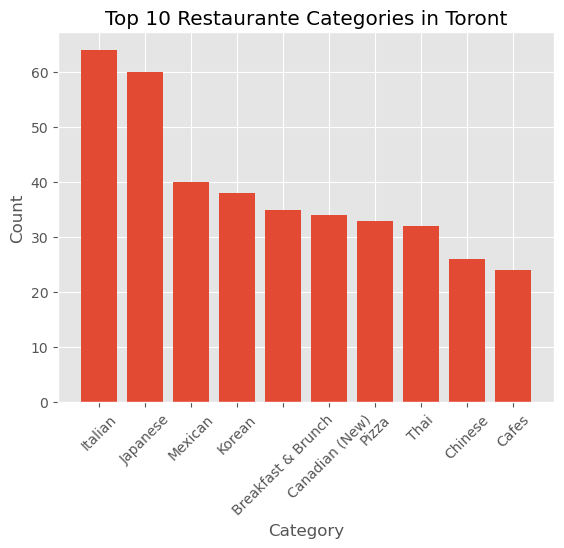

In [59]:
#plot the top 10 restaurant categories into a bar chart
top_10_categories = top_categories_df[top_categories_df['Category'] != 'Others']

plt.style.use('ggplot')
plt.bar(top_10_categories['Category'], top_10_categories['Count'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Restaurante Categories in Toront')
plt.xticks(rotation=45)
plt.show()


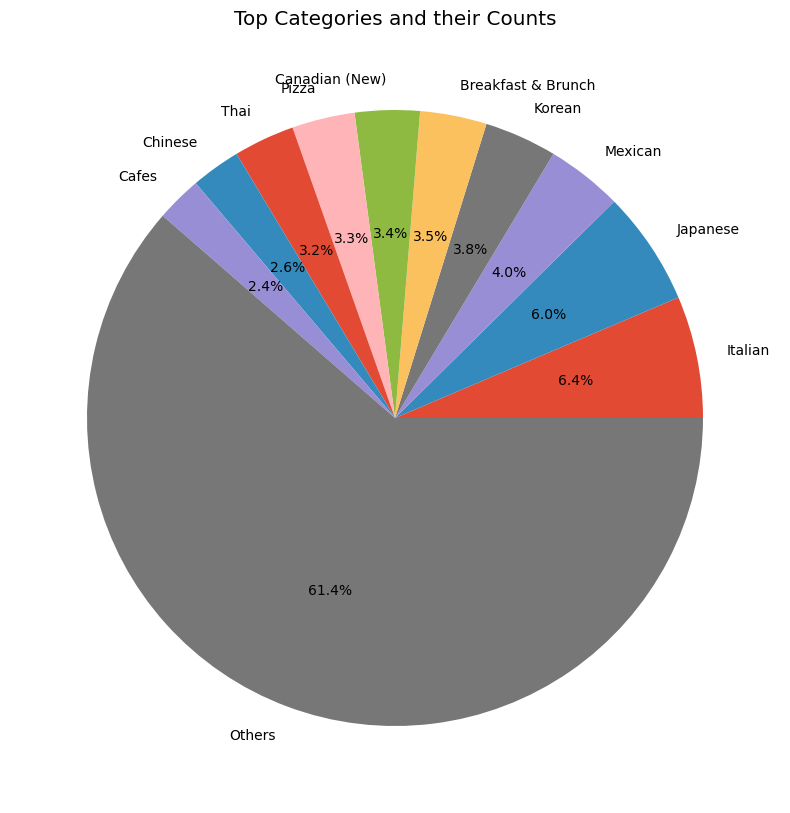

In [58]:
#plot categories into a pie chart
plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
plt.pie(top_categories_df['Count'], labels=top_categories_df['Category'], autopct='%1.1f%%')
plt.title('Top Categories and their Counts')
plt.show()

In [131]:
#count the value of each price
pricing_counts = df['price'].value_counts()
pricing_counts

$$      399
$        88
$$$      76
$$$$     25
Name: price, dtype: int64

/var/folders/fs/0rc1m4zj2yx3w0mhpgq1kbwm0000gn/T/ipykernel_90181/1837140176.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  pricing_counts.index = pricing_counts.index.str.replace('\$', '\$')


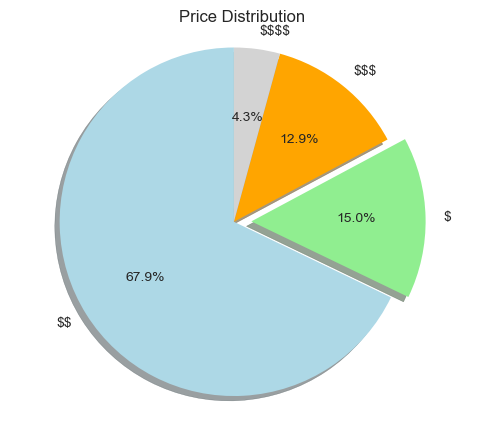

In [132]:
#plot price distribution into pie chart

pricing_counts.index = pricing_counts.index.str.replace('\$', '\$')

sizes = pricing_counts.values
labels = pricing_counts.index
colors = ['lightblue', 'lightgreen', 'orange', 'lightgray']
explode = (0, 0.1, 0, 0) 

fig, ax = plt.subplots(figsize=(6, 5))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)


ax.set_title('Price Distribution')
ax.axis('equal')
plt.show() 



In [108]:
average_review_count = df.groupby('price')['review_count'].mean().round(0)
average_review_count

price
$       148.0
$$      193.0
$$$     201.0
$$$$    263.0
Name: review_count, dtype: float64

/var/folders/fs/0rc1m4zj2yx3w0mhpgq1kbwm0000gn/T/ipykernel_90181/3406254412.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  average_review_count.index = average_review_count.index.str.replace('\$', '\$')


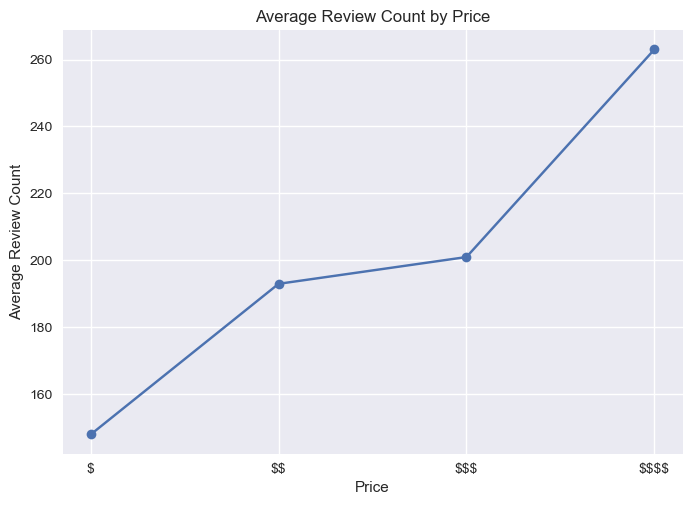

In [110]:
average_review_count.index = average_review_count.index.str.replace('\$', '\$')
plt.plot(average_review_count.index, average_review_count.values, marker='o')
plt.xlabel('Price')
plt.ylabel('Average Review Count')
plt.title('Average Review Count by Price')
plt.grid(True)
plt.show()


In [113]:
#review count and rating analysis to see if higher view count, higher rating
average_rating = df.groupby('price')['rating'].mean().round(2)
average_rating

price
$       4.19
$$      3.99
$$$     3.98
$$$$    4.12
Name: rating, dtype: float64

/var/folders/fs/0rc1m4zj2yx3w0mhpgq1kbwm0000gn/T/ipykernel_90181/1983144524.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  average_rating.index = average_rating.index.str.replace('\$', '\$')


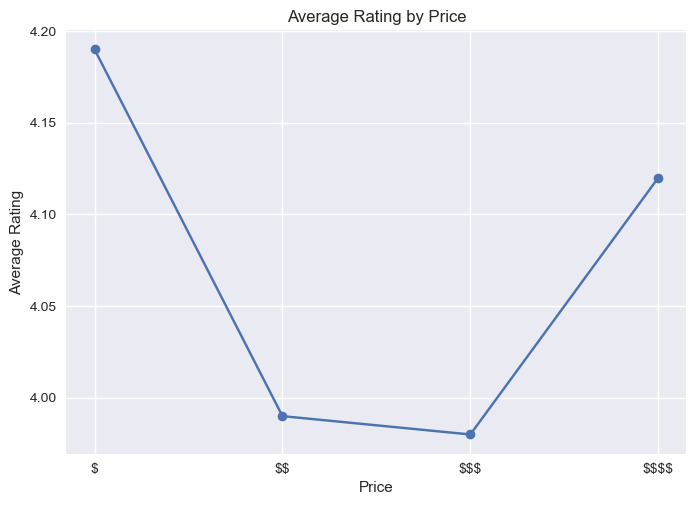

In [114]:
average_rating.index = average_rating.index.str.replace('\$', '\$')
plt.plot(average_rating.index, average_rating.values, marker='o')
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price')
plt.grid(True)
plt.show()
